# Exercise 1

In [1]:
import skimage.io
import skimage.color
import skimage.exposure
import numpy as np
import matplotlib.pyplot as plt

## Task 1

Implementation of some basic vector and matrix calculations using NumPy.

Reference: https://numpy.org/doc/1.18/reference/index.html

Create the following vectors and matrix using numpy. They should use floating point as data type.
$$
a = \begin{bmatrix}
1 & 0 & 1 & 0 & 1
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
1 & 2 & 3 & 4 & 5
\end{bmatrix}
$$

$$
M =\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{bmatrix}
$$

Also define the following scalar value
$$k = 5.0$$

In [2]:
a = np.array([1, 0, 1, 0, 1], dtype = float)
b = np.array([1, 2, 3, 4, 5], dtype = float)
M = np.array([[1, 2, 3] , [4, 5, 6] , [7, 8, 9]] , dtype = float)
k = 5.0


print(f'a = {a}')
print(f'b = {b}')
print(f'M = {M}')
print(f'k = {k}')

a = [1. 0. 1. 0. 1.]
b = [1. 2. 3. 4. 5.]
M = [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
k = 5.0


In [3]:
add = a + b
np.testing.assert_allclose(add, np.array([2, 2, 4, 4, 6]))
print(f'a + b = {add}')


mult = k * a
np.testing.assert_allclose(mult, np.array([5, 0, 5, 0, 5]))
print(f'k * a = {mult}')


dot = a @ b
np.testing.assert_allclose(dot, 9.0)
print(f'<a, b> = {dot}')


c = a[1:4]
np.testing.assert_allclose(c, [0, 1, 0])
print(f'c = {c}')


cM_mult = c * M
np.testing.assert_allclose(cM_mult, [[0, 2, 0], [0, 5, 0], [0, 8, 0]])
print(f'c * M = {cM_mult}')


cM_dot = c @ M
np.testing.assert_allclose(cM_dot, [4, 5, 6])
print(f'<c, M> = {cM_dot}')


d = np.arange(0, 100)


d_small = d_small = d[40:70:10]
np.testing.assert_allclose(d_small, [40, 50, 60])

print(f'd_small = {d_small}')

a + b = [2. 2. 4. 4. 6.]
k * a = [5. 0. 5. 0. 5.]
<a, b> = 9.0
c = [0. 1. 0.]
c * M = [[0. 2. 0.]
 [0. 5. 0.]
 [0. 8. 0.]]
<c, M> = [4. 5. 6.]
d_small = [40 50 60]


## Task 2

1. Load the image in ```./data/pepo.jpg``` from your disk and store it in a variable named ```image``` (use ```skimage.io```).
2. Store and print the shape of the image and the value range (min and max values).
3. Convert it to gray scale and save it in a variable named ```image_gray``` (use ```skimage.color```).
4. Store and print the shape of the grayscale image and the value range (min and max values).
5. Save the grayscale image back to disk in ```./data/pepo_gray.jpg``` (use ```skimage.io```).
6. Use Matplotlib to show the RGB and the grayscale image side by side.

Reference: https://scikit-image.org/docs/stable/index.html  
Reference: https://matplotlib.org/users/index.html  

In [4]:
from skimage import io
from skimage.color import rgb2gray
image = io.imread('./data/pepo.jpg')

rgb_image_shape = image.shape
rgb_min = image.min()
rgb_max = image.max()

print(f'RGB image shape: {rgb_image_shape}')
print(f'RGB image min: {rgb_min}')
print(f'RGB image max: {rgb_max}')

image_gray = rgb2gray(image)

grayscale_image_shape = image_gray.shape
grayscale_min = image_gray.min()
grayscale_max = image_gray.max()
print(f'Grayscale image shape: {grayscale_image_shape}')
print(f'Grayscale image min: {grayscale_min}')
print(f'Grayscale image max: {grayscale_max}')


io.imsave('./data/pepo_gray.jpg', (image_gray * 255).astype(np.uint8))

RGB image shape: (512, 512, 3)
RGB image min: 0
RGB image max: 255
Grayscale image shape: (512, 512)
Grayscale image min: 0.0008333333333333333
Grayscale image max: 1.0


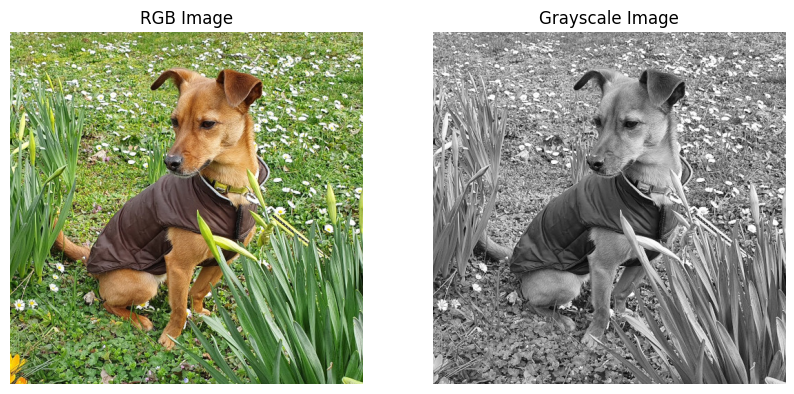

In [5]:
# Create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Show RGB image
ax[0].imshow(image)
ax[0].set_title('RGB Image')
ax[0].axis('off')

# Show Grayscale image
ax[1].imshow(image_gray, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.show()

## Task 3

Plot the color histogram of the rgb image.

Reference: https://matplotlib.org/users/index.html

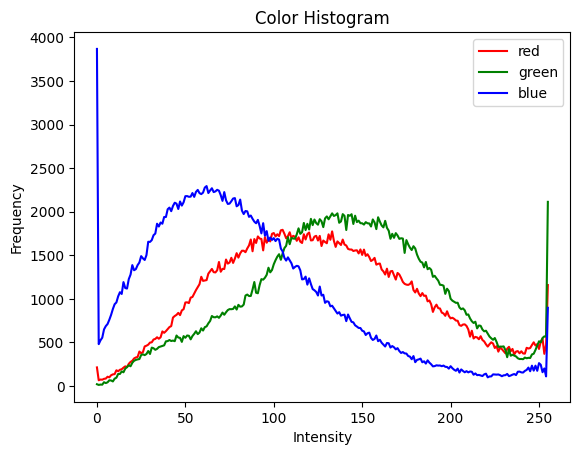

In [6]:

def plot_color_histogram(image):
    color_name = ['red', 'green', 'blue']
    for color in range(3):
      current_channel = image[:, :, color]
      values, counts = np.unique(current_channel, return_counts=True)
      intensities = values.tolist()
      frequencies = counts.tolist()
      plt.plot(intensities, frequencies, color= color_name[color], label= color_name[color])
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Color Histogram')
    plt.show()


plot_color_histogram(image)

## Task 4

Convert the RGB image into the HSV color space. Rotate the colors in the HSV color space, convert it back to the RGB color space and plot it together with its histogram. For this task, you are only allowed to use NumPy.

More information about the HSV color space: https://en.wikipedia.org/wiki/HSL_and_HSV

In [8]:
def rgb2hsv(image):
    image = image.astype('float32') / 255.0
    hsv_image = image.copy()
    for i in range (image.shape[0]):
      for j in range(image.shape[1]):
        R = image[i, j, 0]
        G = image[i, j, 1]
        B = image[i, j, 2]
        Cmax = max(R, G, B)
        Cmin = min(R, G, B)
        delta = Cmax - Cmin

        #Compute H
        H = 0
        if delta == 0:
          H = 0
        elif Cmax == R:
          H = 60 * (((G - B) / delta) % 6)
        elif Cmax == G:
          H = 60 * ((B - R) / delta + 2)
        else:
          H = 60 * ((R - G) / delta + 4)
        while H < 0:
          H += 360.0
        H = H / 360.0
        hsv_image[i, j, 0] = H

        #Compute S
        S = 0
        if Cmax != 0:
          S = delta / Cmax
        hsv_image[i, j, 1] = S

        #Compute V
        V = Cmax
        hsv_image[i, j, 2] = V

    return hsv_image

def hsv2rgb(hsv_image):
    rgb_image = hsv_image.copy()
    for i in range (hsv_image.shape[0]):
      for j in range(hsv_image.shape[1]):
        H = hsv_image[i, j, 0]
        S = hsv_image[i, j, 1]
        V = hsv_image[i, j, 2]
        H = H * 360.0
        C = V * S
        X = C * (1 - abs((H / 60) % 2 - 1))
        m = V - C
        R, G, B = 0, 0, 0
        if 0 <= H < 60:
          R, G, B = C, X, 0
        elif 60 <= H < 120:
          R, G, B = X, C, 0
        elif 120 <= H < 180:
            R, G, B = 0, C, X
        elif 180 <= H < 240:
            R, G, B = 0, X, C
        elif 240 <= H < 300:
            R, G, B = X, 0, C
        elif 300 <= H < 360:
            R, G, B = C, 0, X

        R += m
        G += m
        B += m
        rgb_image[i, j, 0] = R * 255.0
        rgb_image[i, j, 1] = G * 255.0
        rgb_image[i, j, 2] = B * 255.0
    return rgb_image.astype(np.uint8)

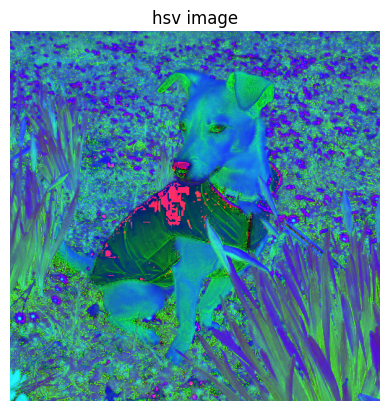

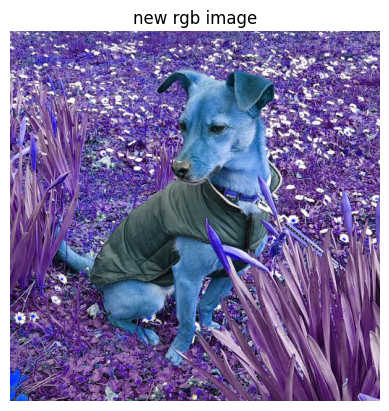

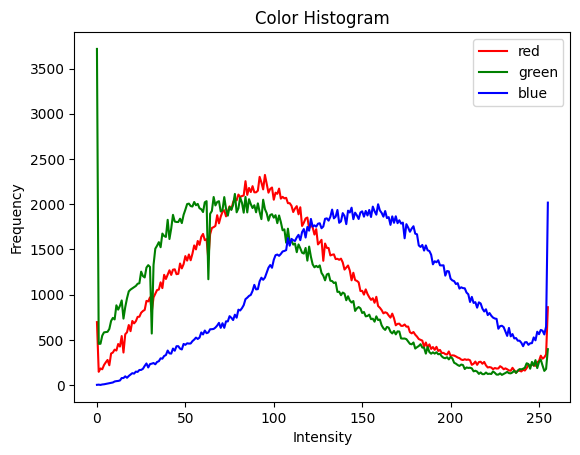

In [9]:
image_hsv = rgb2hsv(image)
plt.imshow(image_hsv)
plt.axis('off')
plt.title("hsv image")
plt.show()

offset = 0.5
for i in range(image_hsv.shape[0]):
  for j in range(image_hsv.shape[1]):
    image_hsv[i, j, 0] = (image_hsv[i, j, 0] + offset) % 1.0

rgb_image = hsv2rgb(image_hsv)
plt.imshow(rgb_image)
plt.axis('off')
plt.title("new rgb image")
plt.show()

plot_color_histogram(rgb_image)